In [1]:
import datacube
import matplotlib.pyplot as plt

product_name = 'aerial_image_1999'

query = {
    'time': ('1999-01-01', '1999-12-31'),
    'latitude': ( -19.909769510495842, -19.937043958977434),
    'longitude': ( -43.9339828491211, -43.96745681762696),
}

bands = ['band_1', 'band_2', 'band_3'] 


In [2]:


dc = datacube.Datacube()
dc.index.products.get_by_name(product_name)


output_crs = 'EPSG:29193'
resolution=(-0.399711, 0.399711)

ds = dc.load(product=product_name, output_crs=output_crs, resolution=resolution, **query)

print(ds)


<xarray.Dataset>
Dimensions:      (time: 1, x: 8814, y: 7608)
Coordinates:
  * time         (time) datetime64[ns] 1999-07-02
  * y            (y) float64 7.798e+06 7.798e+06 ... 7.795e+06 7.795e+06
  * x            (x) float64 6.081e+05 6.081e+05 ... 6.116e+05 6.116e+05
    spatial_ref  int32 29193
Data variables:
    band_1       (time, y, x) uint8 0 0 0 0 0 0 0 ... 146 139 139 143 146 148
    band_2       (time, y, x) uint8 0 0 0 0 0 0 0 ... 143 136 136 140 143 145
    band_3       (time, y, x) uint8 0 0 0 0 0 0 0 ... 136 131 131 135 138 140
Attributes:
    crs:           EPSG:29193
    grid_mapping:  spatial_ref


['1999-07-02T00:00:00.000000000']


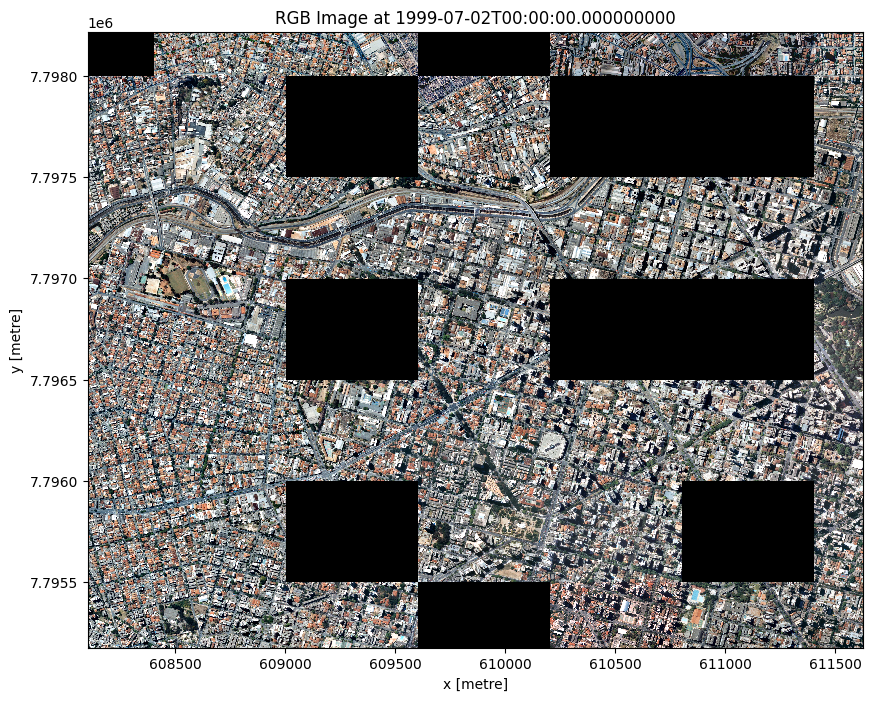

In [16]:
# Selecione as bandas desejadas
rgb_bands = ds[['band_1', 'band_2', 'band_3']]

available_times = ds.time.values
print(available_times)

# Especifique o tempo desejado (por exemplo, o primeiro tempo no conjunto de dados)
time_index = 0

# Selecione os dados para o tempo específico
rgb_data = rgb_bands.isel(time=time_index).to_array().transpose('y', 'x', 'variable')

# Aumente o tamanho do plot
plt.figure(figsize=(10, 8))  # Ajuste os valores de largura e altura conforme necessário

# Plote a imagem RGB
rgb_data.plot.imshow(robust=True)
plt.title(f'RGB Image at {ds["time"].values[time_index]}')
plt.show()
